In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from fixed_processing import cropNalign, crop
from segmentation_routines import *

In [2]:
root_dir="E:\\Rich\\Data\\ID_Trial_NoBorder\\CT\\tall"
scan_name="tall_rotated.raw"    #with extension
file_path=os.path.join(root_dir, scan_name)

In [3]:
img_params=create_img_dict(os.path.join(root_dir, (scan_name[:-4]+'_imgParams.pickle')))

In [4]:
print(img_params)

{'shape': (4415, 1048, 848), 'mask thresh': 10000, 'min pore': 3, 'mask max hole': 20, 'kernel 1': 7, 'kernel 2': 5, 'edge trim': 25, 'encoding': 'uint16', 'gauss kernel': 3}


In [5]:
# try out making some changes: set the shape
img_params['shape']=(4415, 1048,848)

In [68]:
print(img_params)
check_changes(img_params, root_dir, scan_name)

{'shape': (4415, 1048, 848), 'mask thresh': 18227, 'min pore': 4, 'mask max hole': 15, 'kernel 1': 7, 'kernel 2': 5, 'edge trim': 21, 'encoding': 'uint16', 'gauss kernel': 7}
Parameters changed, overwriting...


In [7]:
import imageio
data=imageio.volread("E:\\Rich\\Data\\ID_Trial_NoBorder\\CT\\tall\\tall_rotated_cropped.tif", format='TIFF')

In [22]:
imgs=data[50:-50:int(len(data)/10)]
pores=np.zeros(imgs.shape)
mask=np.zeros(imgs.shape)
print(imgs.shape)

(10, 1048, 848)


In [23]:
for i, img in enumerate(imgs):
    mask[i], pores[i]=mask_and_pores(img, img_params, adapt=True, gauss=True)

In [24]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

<IPython.core.display.Javascript object>


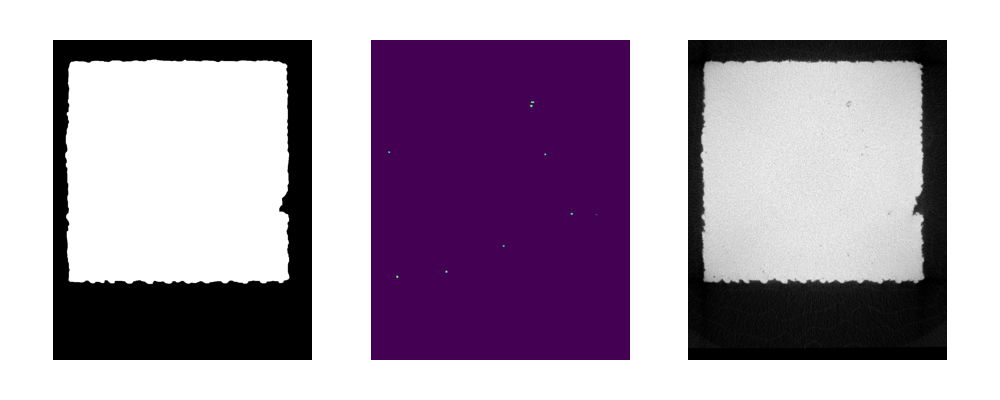

IntSlider(value=1, description='Z:', max=9)

IntSlider(value=18219, description='Mask Threshold:', max=32767)

IntSlider(value=4, description='Minimum pore size:', max=50)

IntSlider(value=15, description='Max mask hole:', max=50)

IntSlider(value=7, description='1st kernel:', max=50, min=1)

IntSlider(value=5, description='2nd kernel:', max=50, min=1)

IntSlider(value=21, description='Edge trim:', max=50, min=1)

IntSlider(value=7, description='Gauss kernel size:', max=50, min=1)

In [65]:
%matplotlib notebook
fig, ax = plt.subplots(1,3, figsize = (10,4))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.9)
img1=ax[0].imshow(mask[1], cmap='gray')
img2=ax[1].imshow(pores[1])
img3=ax[2].imshow(imgs[1], cmap='gray')
for a in ax:
    a.set_axis_off()
#img3=ax[2].imshow(mask[1], cmap='viridis', alpha=0.2)
#img3=ax[2].imshow(pores[1], cmap='jet', alpha=0.2)

def animate(z):
    img1.set_data(mask[z])
    img2.set_data(pores[z])
    img3.set_data(imgs[z])
    return img1,img2,img3

def param_adjust(a,b,c,d,e,f,g):
    img_params['mask thresh']=a
    img_params['min pore']=b
    img_params['mask max hole']=c
    img_params['kernel 1']=d
    img_params['kernel 2']=e
    img_params['edge trim']=f
    img_params['gauss kernel']=g
    
    for i, img in enumerate(imgs):
        mask[i], pores[i]=mask_and_pores(img, img_params, adapt=True, gauss=True)
        
    img1.set_data(mask[z])
    img2.set_data(pores[z])
    img3.set_data(imgs[z])
    return img1, img2, img3, mask, pores

Z_slider = widgets.IntSlider(description='Z:',
                                value=1,
                                min=0,
                                max=imgs.shape[0]-1, step=1)

mask_thresh_slider= widgets.IntSlider(description='Mask Threshold:',
                                value=img_params['mask thresh'],
                                min=0,
                                max=32767, step=1)
min_pore_slider= widgets.IntSlider(description='Minimum pore size:',
                                value=img_params['min pore'],
                                min=0,
                                max=50, step=1)
mask_hole_slider= widgets.IntSlider(description='Max mask hole:',
                                value=img_params['mask max hole'],
                                min=0,
                                max=50, step=1)
kernel1= widgets.IntSlider(description='1st kernel:',
                                value=img_params['kernel 1'],
                                min=1,
                                max=50, step=1)
kernel2= widgets.IntSlider(description='2nd kernel:',
                                value=img_params['kernel 2'],
                                min=1,
                                max=50, step=1)
edge_trim= widgets.IntSlider(description='Edge trim:',
                                value=img_params['edge trim'],
                                min=1,
                                max=50, step=1)
gauss_kernel= widgets.IntSlider(description='Gauss kernel size:',
                                value=img_params['gauss kernel'],
                                min=1,
                                max=50, step=1)



app = widgets.interactive(animate,
               z = Z_slider)

app2 = widgets.interactive(param_adjust, a = mask_thresh_slider, b = min_pore_slider, 
                           c=mask_hole_slider, d=kernel1, e=kernel2, f=edge_trim, g=gauss_kernel)

display(Z_slider, mask_thresh_slider, min_pore_slider, mask_hole_slider, kernel1, kernel2, edge_trim, gauss_kernel)

In [67]:
%%time
_, _=mask_and_pores(img[100], img_params, adapt=True, gauss=True)

Wall time: 3 ms


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: problems found:
        - require?  X jupyter-js-widgets/extension
